## Importation données et librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
%matplotlib inline

from sklearn.impute import KNNImputer


In [2]:
raw = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

## Nettoyage du jeu de données

In [4]:
raw.duplicated().sum()

0

In [5]:
raw['ComplianceStatus'].value_counts()

Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

In [6]:
raw['Outlier'].value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [7]:
raw['DefaultData'].value_counts()

False    3263
True      113
Name: DefaultData, dtype: int64

In [8]:
raw.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  ...  SiteEnergyUse(kBtu)  \
count     3376.000000      3.376000e+03  ...         3.371000e+03   
mean         4.709123      9.483354e+04  ...         5.403667e+06   
std          5.494465      2.188376e+05  ...         2.161063e+07   
min          0.000000      1.128500e+04  ...         0.000000e+00   
25%          2.000000      2.848700e+04  ...         9.251286e+05   
50%          4.000000      4.417500e+04  ...         1.803753e+06   
75%          5.000000      9.099200e+04  ...         4.222455e+06   
max         99.000000      9.320156e+06  ...         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.370000e+03    3.367000e+03      3.367000e+03   
mean            5.276726e+06    2.745959e+05      1.086639e+06   
std             1.593879e+07    3.912173e+06      4.352478e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%             9.701822e+05    0.000000e+00      1.874229e+05   
50%             1.904452e+06    0.000000e+00      3.451299e+05   
75%             4.381429e+06    0.000000e+00      8.293178e+05   
max             4.716139e+08    1.349435e+08      1.925775e+08   

       Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  Comments  \
count       3.367000e+03        3.367000e+03      3.367000e+03       0.0   
mean        3.707612e+06        1.368505e+04      1.368505e+06       NaN   
std         1.485066e+07        6.709781e+04      6.709781e+06       NaN   
min        -1.154170e+05        0.000000e+00      0.000000e+00       NaN   
25%         6.394870e+05        0.000000e+00      0.000000e+00       NaN   
50%         1.177583e+06        3.237538e+03      3.237540e+05       NaN   
75%         2.829632e+06        1.189033e+04      1.189034e+06       NaN   
max         6.570744e+08        2.979090e+06      2.979090e+08       NaN   

       TotalGHGEmissions  GHGEmissionsIntensity  
count        3367.000000            3367.000000  
mean          119.723971               1.175916  
std           538.832227               1.821452  
min            -0.800000              -0.020000  
25%             9.495000               0.210000  
50%            33.920000               0.610000  
75%            93.940000               1.370000  
max         16870.980000              34.090000  

[8 rows x 30 columns]

In [9]:
raw.dropna(axis=1,inplace=True,how='all')

<AxesSubplot:>

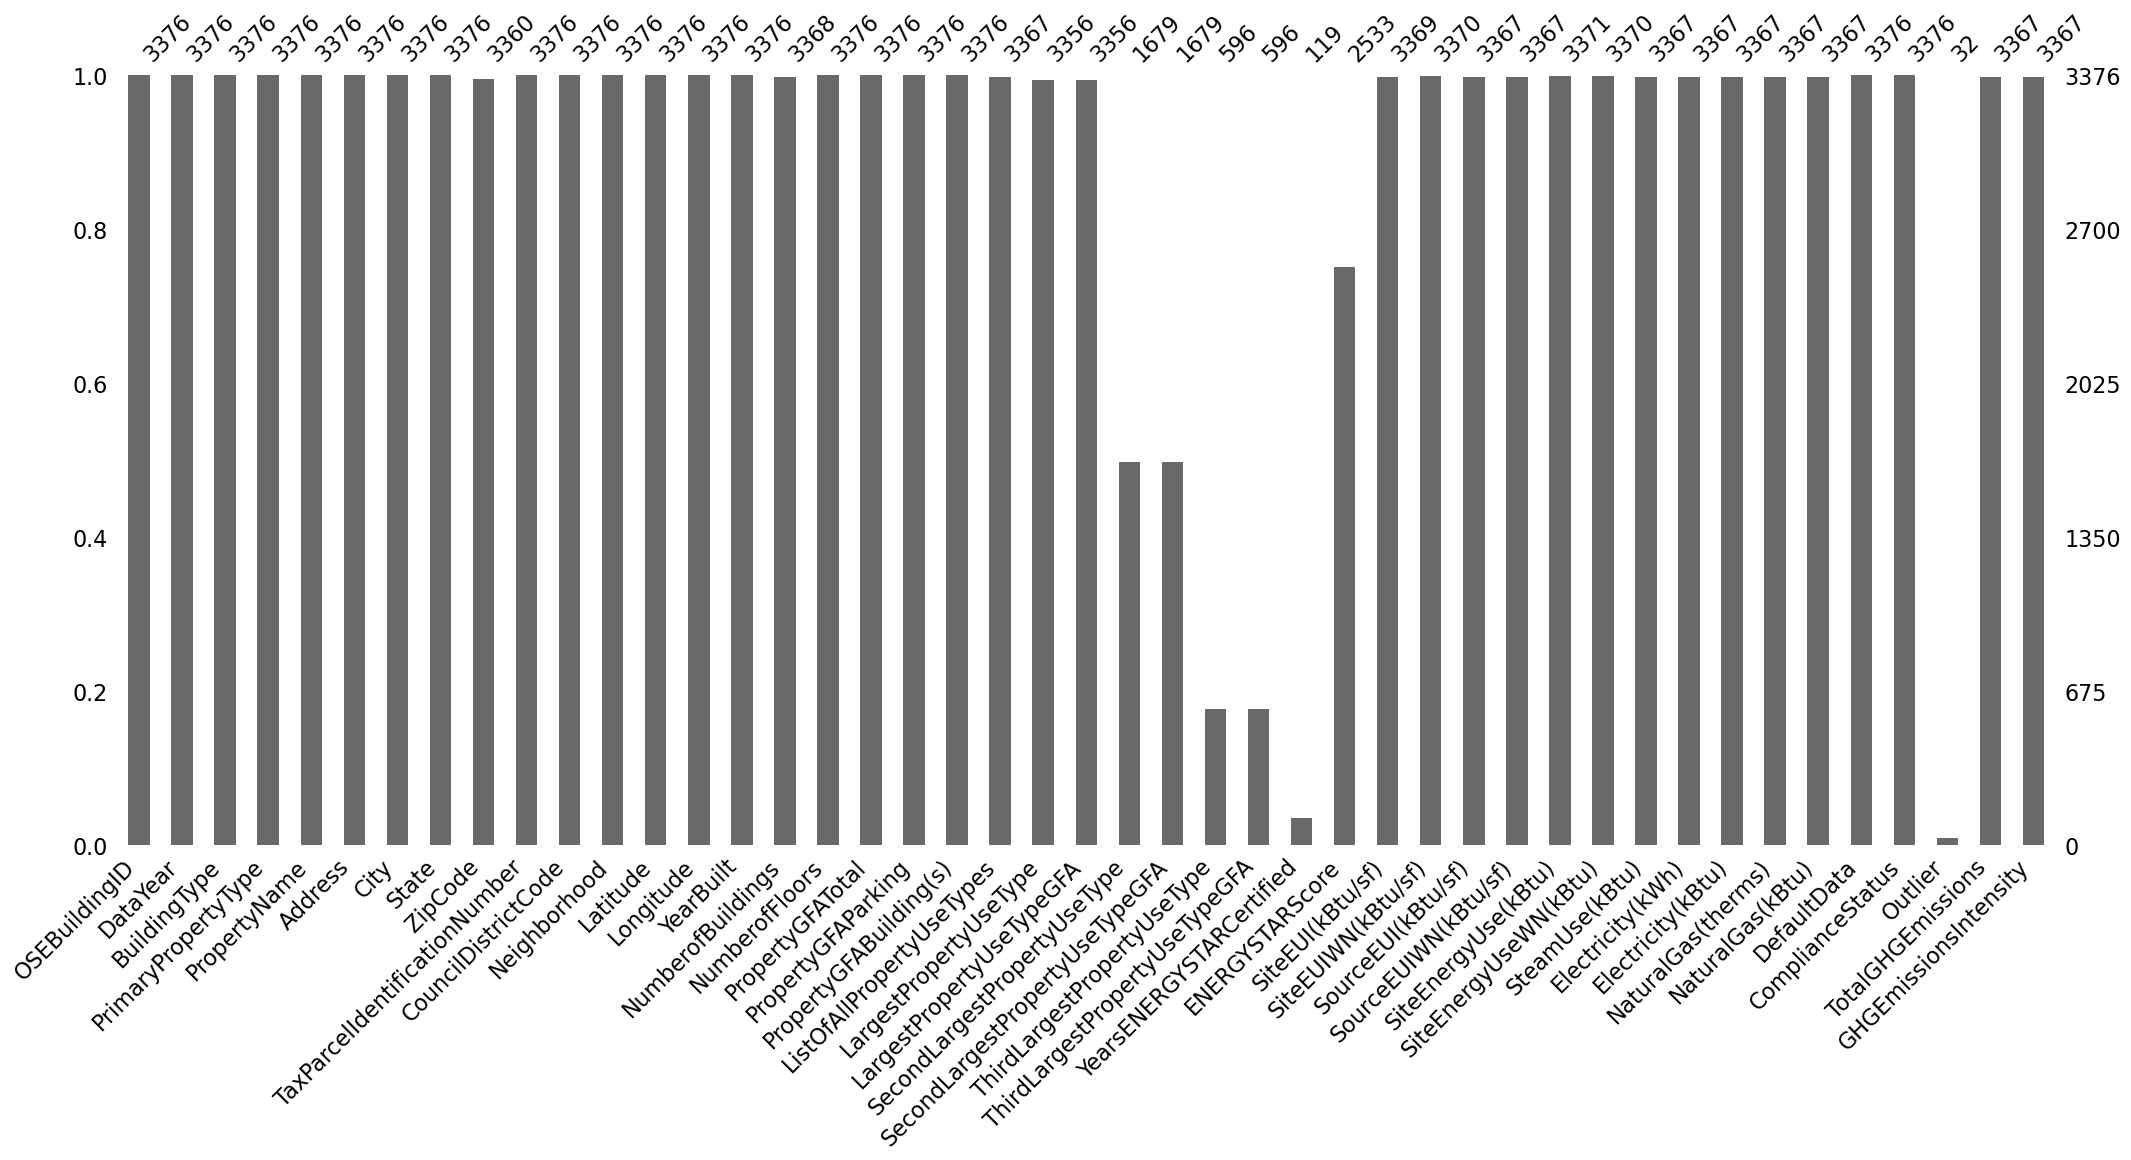

In [10]:
msno.bar(raw)

In [11]:
raw['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [12]:
raw['CouncilDistrictCode'].value_counts()

7    1037
3     596
2     509
4     367
5     338
1     282
6     247
Name: CouncilDistrictCode, dtype: int64

In [13]:
raw['Neighborhood'].value_counts()

DOWNTOWN                  573
EAST                      453
MAGNOLIA / QUEEN ANNE     423
GREATER DUWAMISH          375
NORTHEAST                 280
LAKE UNION                251
NORTHWEST                 210
SOUTHWEST                 166
NORTH                     145
BALLARD                   126
CENTRAL                   107
SOUTHEAST                  95
DELRIDGE                   80
North                      42
Central                    27
Northwest                  11
Ballard                     7
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [14]:
raw.loc[raw['BuildingType'].str.contains("Nonresidential") == True, 'BuildingType'] = 'NonResidential' 
raw = raw[raw['BuildingType'].str.contains("NonResidential|Campus|SPS-District K-12") == True]
raw['BuildingAge']=2016-raw['YearBuilt']
raw['Neighborhood'] = raw['Neighborhood'].str.upper().str.replace(" NEIGHBORHOODS", "")
raw = raw.loc[((raw['PrimaryPropertyType'] != 'Office') & (raw['ComplianceStatus']=='Compliant'))]


In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1548 non-null   int64  
 1   DataYear                         1548 non-null   int64  
 2   BuildingType                     1548 non-null   object 
 3   PrimaryPropertyType              1548 non-null   object 
 4   PropertyName                     1548 non-null   object 
 5   Address                          1548 non-null   object 
 6   City                             1548 non-null   object 
 7   State                            1548 non-null   object 
 8   ZipCode                          1535 non-null   float64
 9   TaxParcelIdentificationNumber    1548 non-null   object 
 10  CouncilDistrictCode              1548 non-null   int64  
 11  Neighborhood                     1548 non-null   object 
 12  Latitude            

### Transformation des variables de consommatio par type d'énergie 

In [16]:
for col in raw[['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']].columns : 
    raw=raw.loc[raw[col]>=0]
    raw.loc[raw[col]==0,col] = 0
    raw.loc[raw[col]>0,col] = 1
    

raw['NumberofSources'] = raw[['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']].sum(axis=1)



In [17]:
raw = raw[['OSEBuildingID','BuildingAge','BuildingType','PrimaryPropertyType','Neighborhood','NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking','LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','ENERGYSTARScore','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','NumberofSources','TotalGHGEmissions']]

In [18]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 3375
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1547 non-null   int64  
 1   BuildingAge                      1547 non-null   int64  
 2   BuildingType                     1547 non-null   object 
 3   PrimaryPropertyType              1547 non-null   object 
 4   Neighborhood                     1547 non-null   object 
 5   NumberofBuildings                1547 non-null   float64
 6   NumberofFloors                   1547 non-null   int64  
 7   PropertyGFATotal                 1547 non-null   int64  
 8   PropertyGFAParking               1547 non-null   int64  
 9   LargestPropertyUseType           1543 non-null   object 
 10  LargestPropertyUseTypeGFA        1543 non-null   float64
 11  SecondLargestPropertyUseType     842 non-null    object 
 12  SecondLargestPropert

In [19]:
quali_cols = raw[['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType',]].columns
quanti_cols = raw.select_dtypes(exclude='object').columns
quanti_cols

Index(['OSEBuildingID', 'BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'NumberofSources',
       'TotalGHGEmissions'],
      dtype='object')

## Imputation des variables catégorielles manquantes

In [20]:
for col in quali_cols :
    raw.loc[raw[col].isna()==True,col] = 'Unknown'

## Recherche et correction de valeurs abberrantes et atypiques

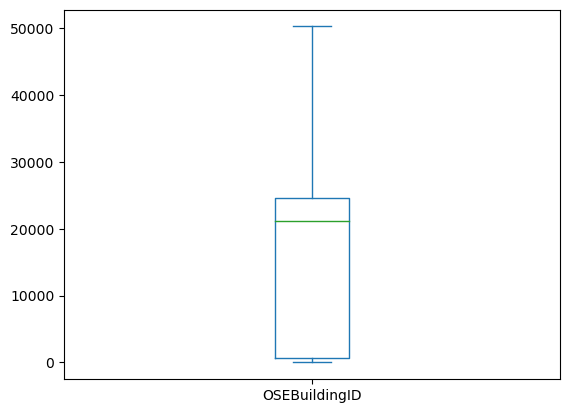

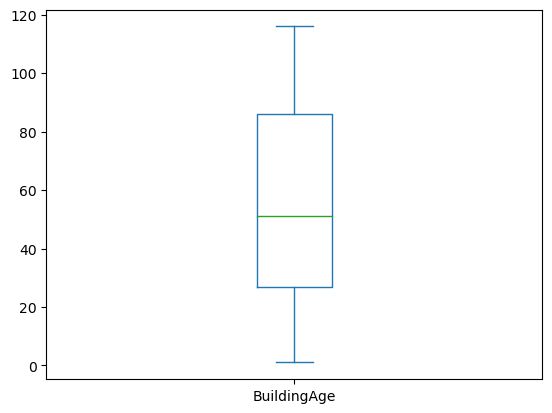

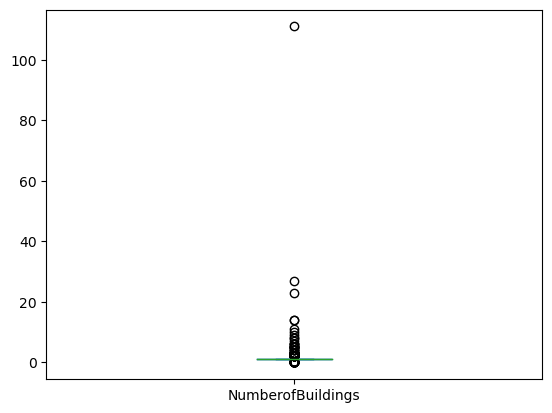

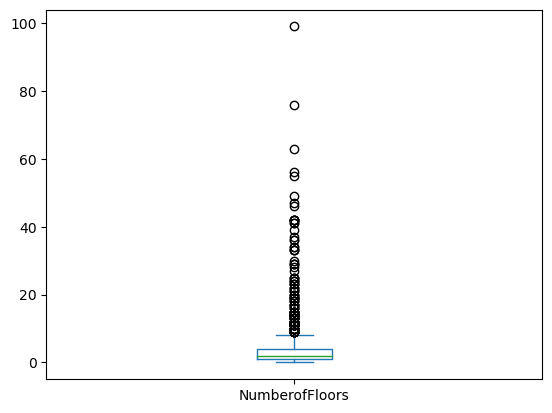

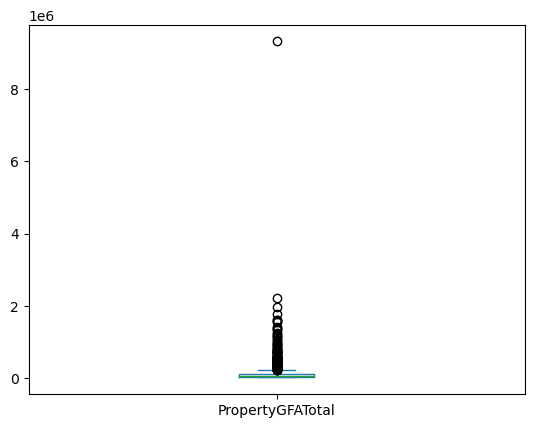

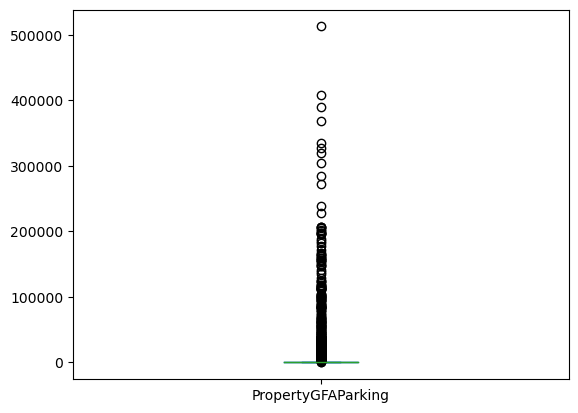

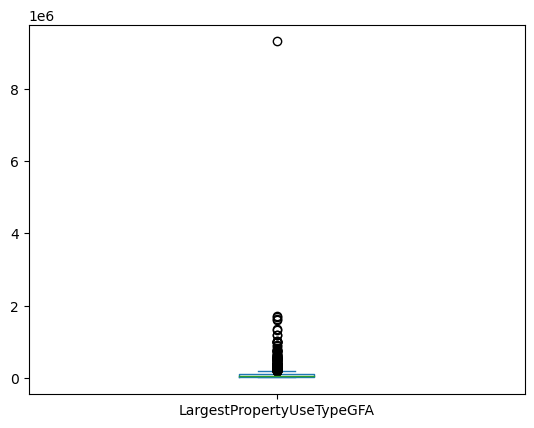

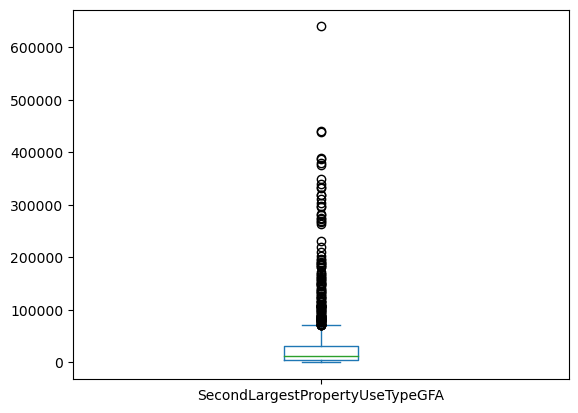

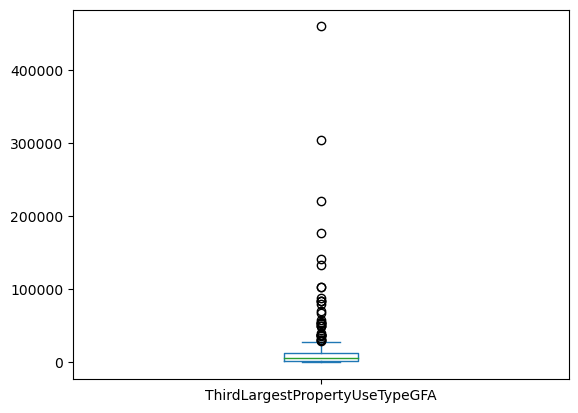

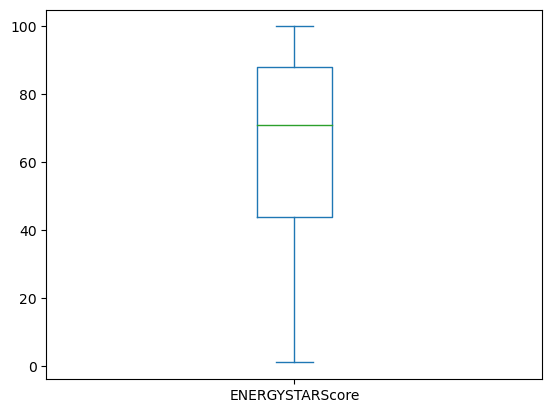

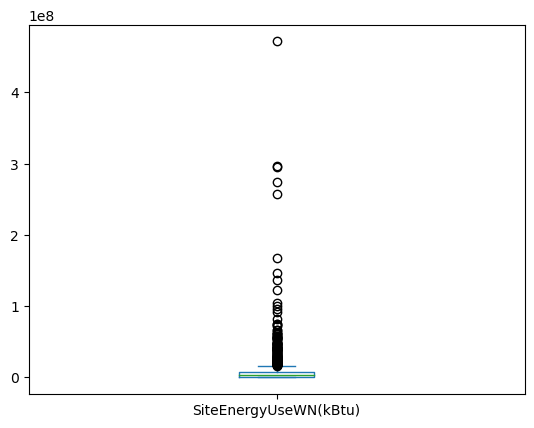

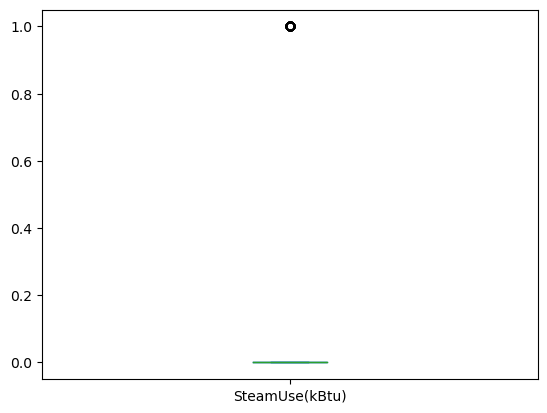

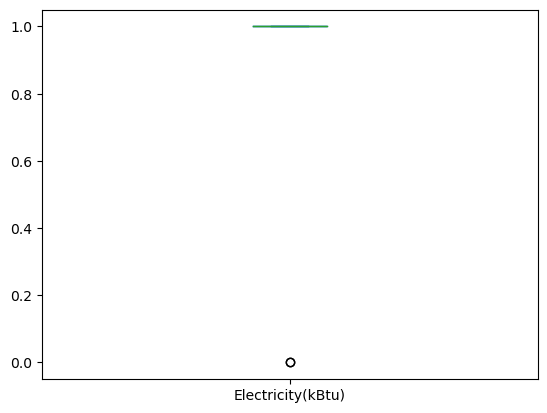

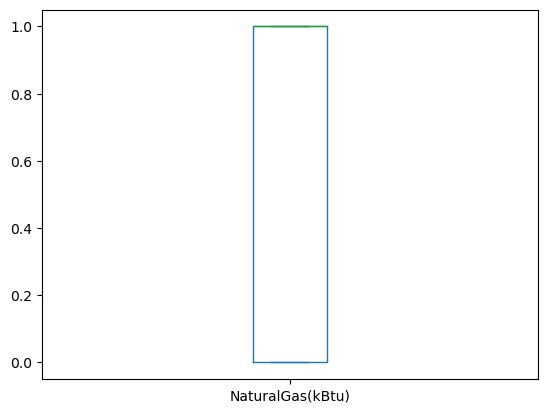

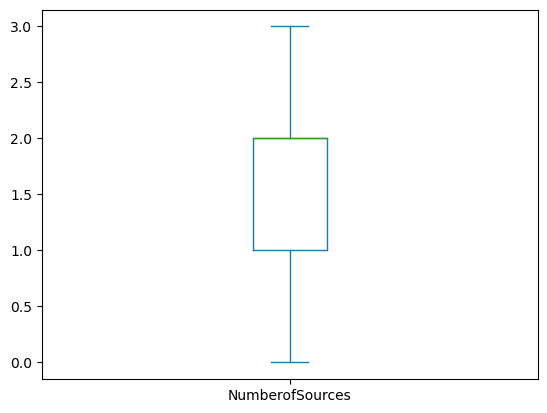

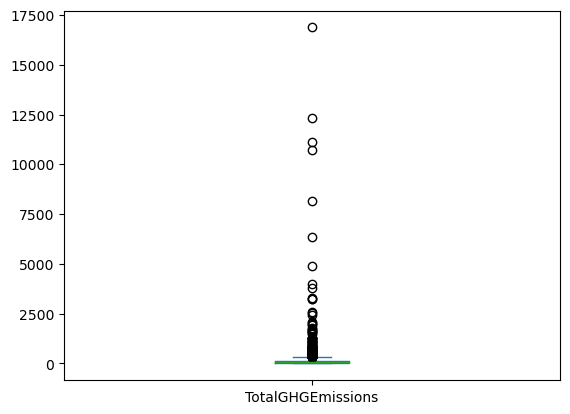

In [21]:
for col in quanti_cols :
    plt.figure()
    raw[col].plot(kind="box")
    plt.show()

In [22]:
raw['PropertyGFATotal'].max()

9320156

In [23]:
raw = raw.loc[((raw['NumberofBuildings']<40)&(raw['NumberofFloors']<80)&(raw['PropertyGFATotal']<3000000)&(raw['SiteEnergyUseWN(kBtu)']<100000000)&(raw['TotalGHGEmissions']<3000))]
raw = raw.loc[raw['PropertyGFATotal']*1.1>raw['LargestPropertyUseTypeGFA']]


In [24]:
quali_cols = raw.select_dtypes(include='object').columns

Y = "SiteEnergyUseWN(kBtu)" # quantitative
Z = "TotalGHGEmissions" # quantitative


def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

for col in quali_cols : 
    X = col # qualitative
    print('rapport de corrélation de la variable : '+str(col))
    print("avec la conso d'énergie par surface :" + str(eta_squared(raw[X],raw[Y])))
    print("avec les émissions de carbone par surface :" + str(eta_squared(raw[X],raw[Z])))


rapport de corrélation de la variable : BuildingType
avec la conso d'énergie par surface :0.009309657452007337
avec les émissions de carbone par surface :0.005374168287215446
rapport de corrélation de la variable : PrimaryPropertyType
avec la conso d'énergie par surface :0.2582020304570916
avec les émissions de carbone par surface :0.27762339782502404
rapport de corrélation de la variable : Neighborhood
avec la conso d'énergie par surface :0.07500495771686021
avec les émissions de carbone par surface :0.04988238457969597
rapport de corrélation de la variable : LargestPropertyUseType
avec la conso d'énergie par surface :0.20204672333719276
avec les émissions de carbone par surface :0.29583356902847907
rapport de corrélation de la variable : SecondLargestPropertyUseType
avec la conso d'énergie par surface :0.10878063298190897
avec les émissions de carbone par surface :0.08238936048145466
rapport de corrélation de la variable : ThirdLargestPropertyUseType
avec la conso d'énergie par surfa

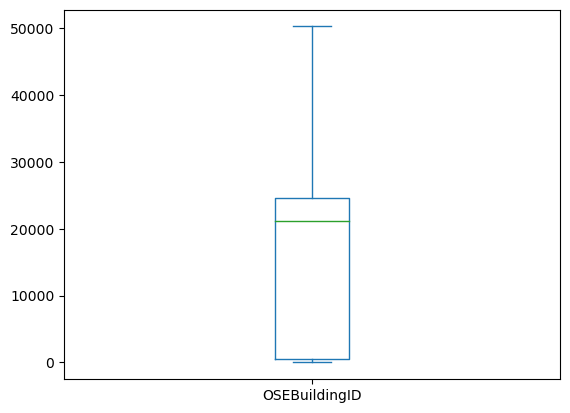

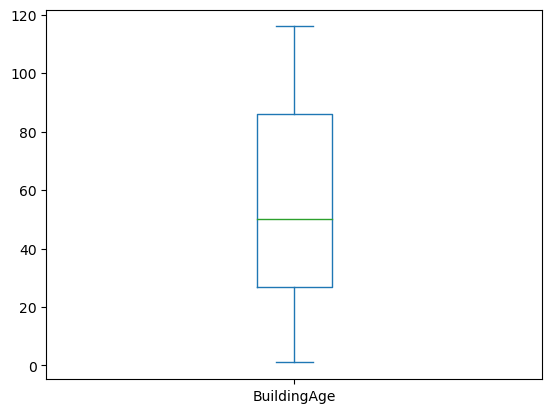

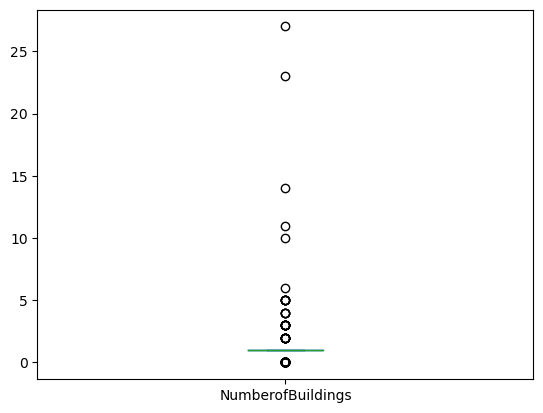

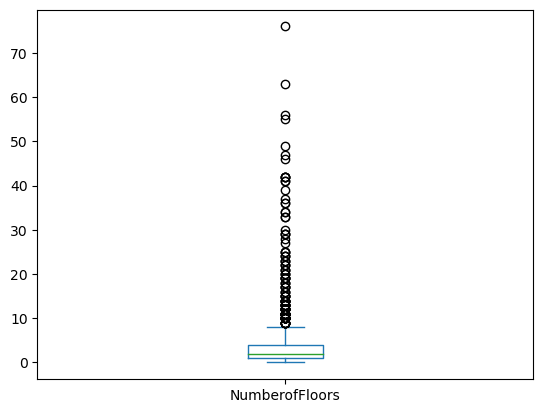

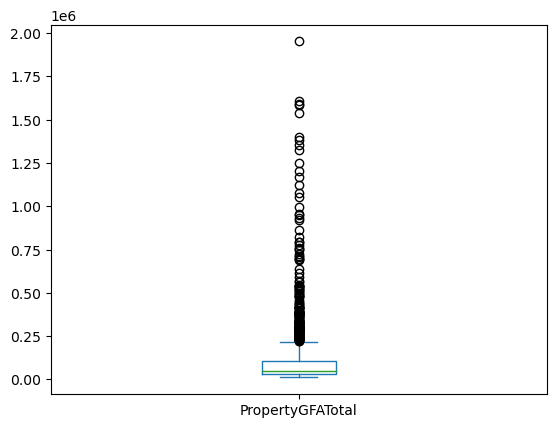

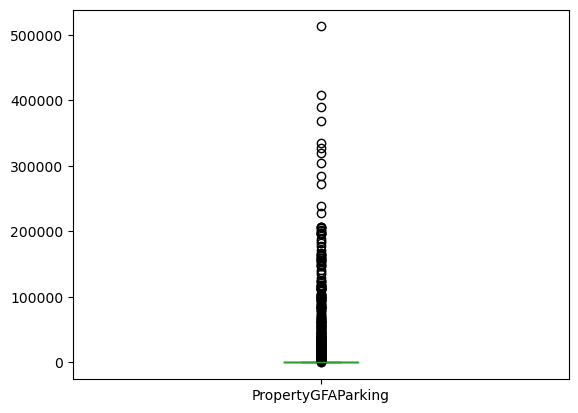

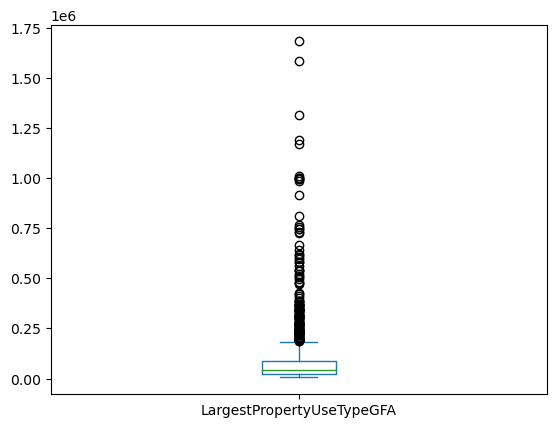

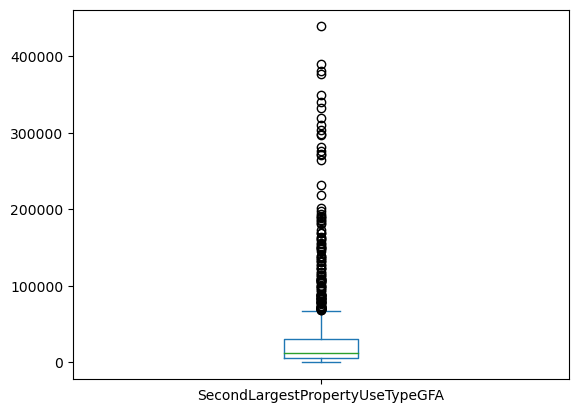

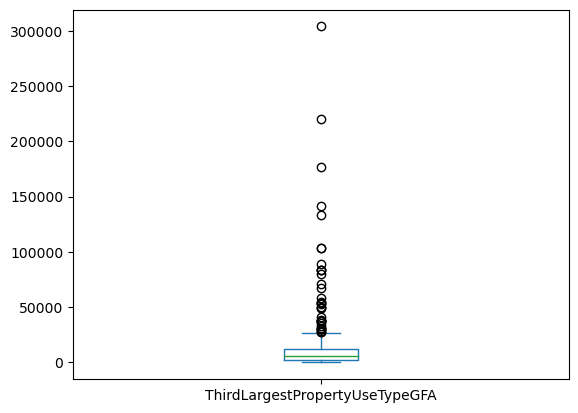

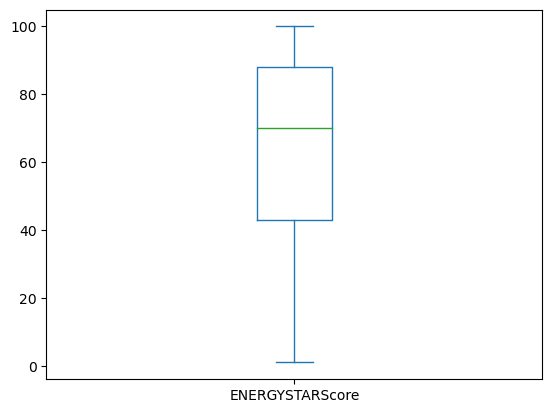

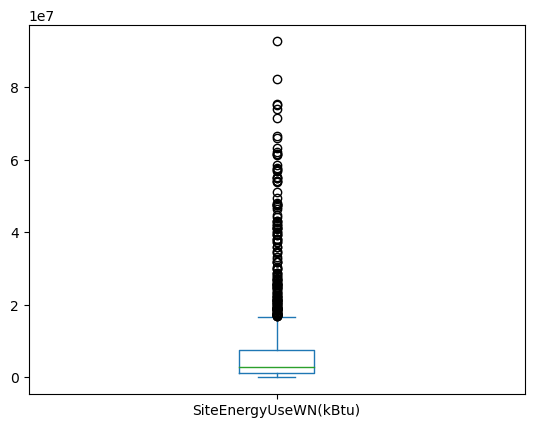

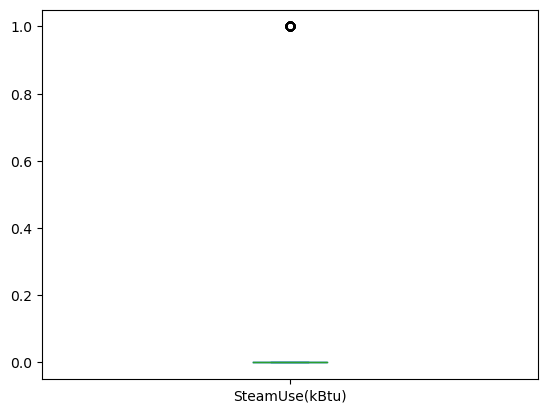

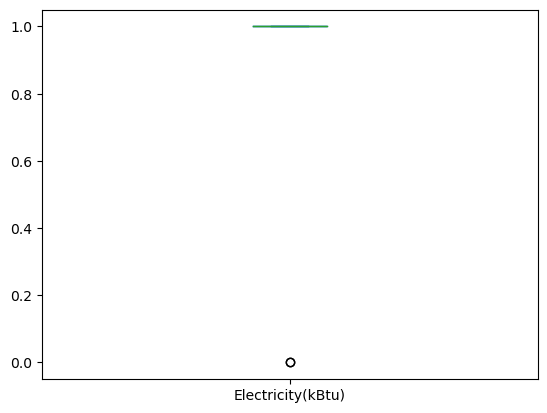

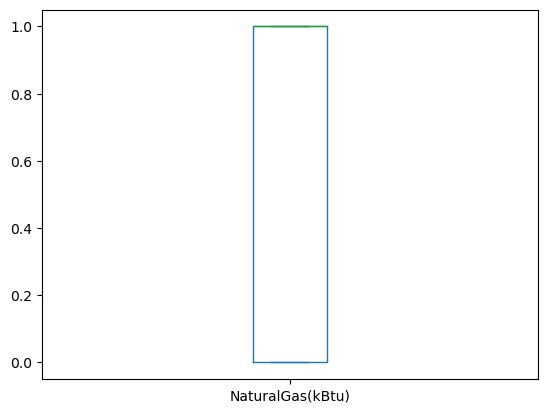

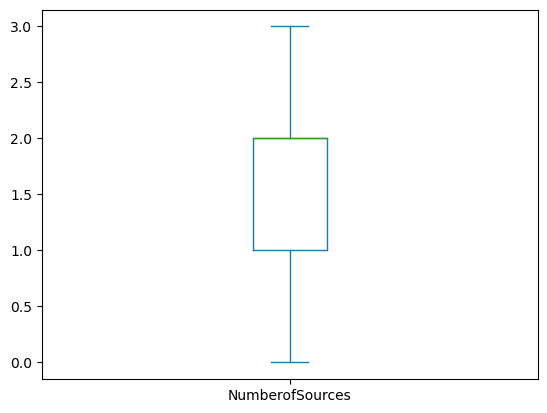

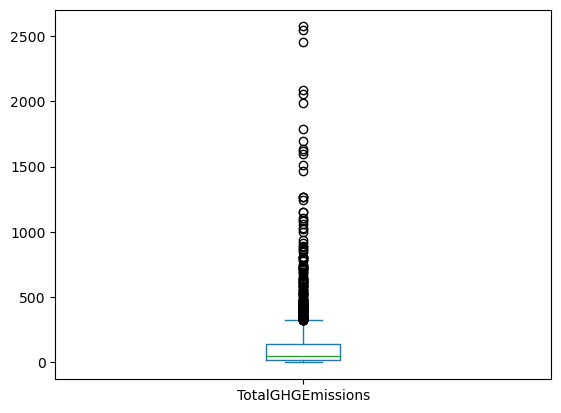

In [25]:
for col in quanti_cols :
    plt.figure()
    raw[col].plot(kind="box")
    plt.show()

<AxesSubplot:>

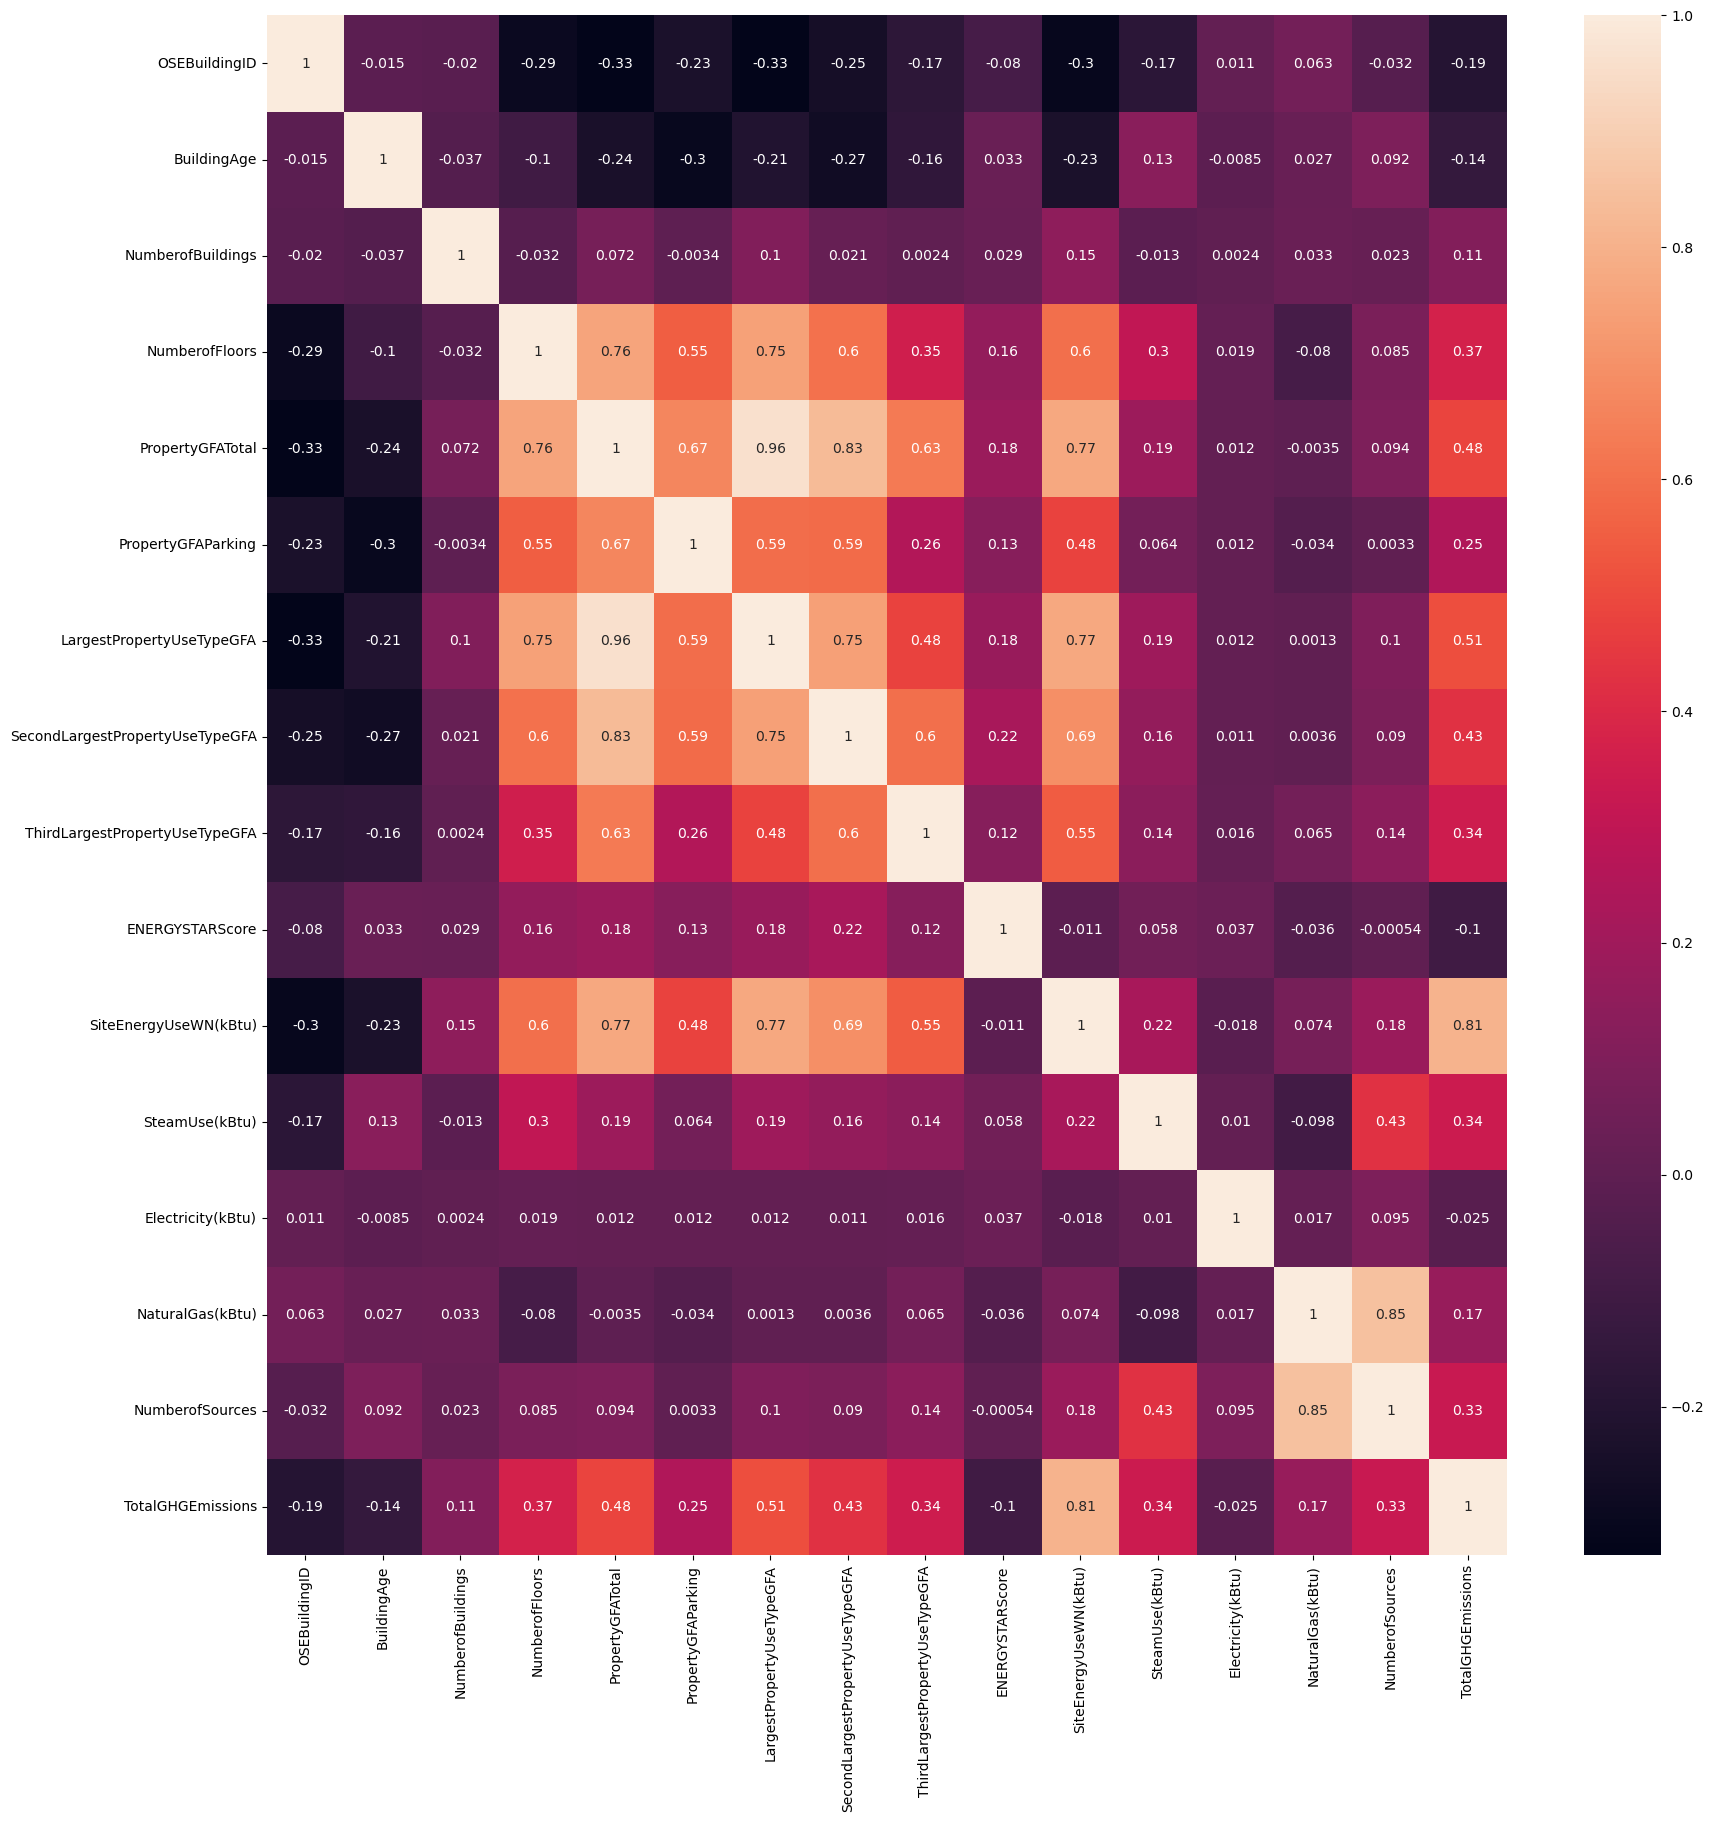

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(raw[quanti_cols].corr(),annot=True)

In [27]:
raw.describe()

OSEBuildingID  BuildingAge  NumberofBuildings  NumberofFloors  \
count    1455.000000  1455.000000        1455.000000     1455.000000   
mean    16219.282474    54.415808           1.070790        4.237113   
std     13685.371874    32.921141           1.098864        6.371964   
min         1.000000     1.000000           0.000000        0.000000   
25%       593.000000    27.000000           1.000000        1.000000   
50%     21177.000000    50.000000           1.000000        2.000000   
75%     24588.000000    86.000000           1.000000        4.000000   
max     50226.000000   116.000000          27.000000       76.000000   

       PropertyGFATotal  PropertyGFAParking  LargestPropertyUseTypeGFA  \
count      1.455000e+03         1455.000000               1.455000e+03   
mean       1.114806e+05        14605.978007               8.701344e+04   
std        1.844692e+05        44914.054038               1.434018e+05   
min        1.128500e+04            0.000000               5.656000e+03   
25%        2.888400e+04            0.000000               2.422550e+04   
50%        4.817900e+04            0.000000               4.080900e+04   
75%        1.049235e+05            0.000000               8.876400e+04   
max        1.952220e+06       512608.000000               1.680937e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       806.000000                      340.000000   
mean                      33713.851485                    13691.445290   
std                       58283.613580                    28508.062286   
min                           0.000000                        0.000000   
25%                        5687.250000                     2624.250000   
50%                       12011.500000                     5884.000000   
75%                       30260.250000                    12369.250000   
max                      438756.000000                   303910.000000   

       ENERGYSTARScore  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
count       937.000000           1.455000e+03     1455.000000   
mean         63.303095           6.956801e+06        0.072165   
std          28.886899           1.109605e+07        0.258850   
min           1.000000           0.000000e+00        0.000000   
25%          43.000000           1.299341e+06        0.000000   
50%          70.000000           2.789899e+06        0.000000   
75%          88.000000           7.442882e+06        0.000000   
max         100.000000           9.253726e+07        1.000000   

       Electricity(kBtu)  NaturalGas(kBtu)  NumberofSources  TotalGHGEmissions  
count        1455.000000       1455.000000      1455.000000        1455.000000  
mean            0.998625          0.712027         1.782818         136.877491  
std             0.037062          0.452974         0.501285         251.140656  
min             0.000000          0.000000         0.000000           0.000000  
25%             1.000000          0.000000         1.000000          20.550000  
50%             1.000000          1.000000         2.000000          49.550000  
75%             1.000000          1.000000         2.000000         142.375000  
max             1.000000          1.000000         3.000000        2573.750000

## Transformation de variables catégorielles en numériques (usages du bâtiment et surfaces par usage)

In [28]:
raw['LargestPropertyUseTypeGFA']=raw['LargestPropertyUseTypeGFA']/raw['PropertyGFATotal']
raw['SecondLargestPropertyUseTypeGFA']=raw['SecondLargestPropertyUseTypeGFA']/raw['PropertyGFATotal']
raw['ThirdLargestPropertyUseTypeGFA']=raw['ThirdLargestPropertyUseTypeGFA']/raw['PropertyGFATotal']

In [29]:
df_1 = raw.drop(columns=['SecondLargestPropertyUseType','ThirdLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'])
df_2 = raw.drop(columns=['LargestPropertyUseType','ThirdLargestPropertyUseType','LargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'])
df_3 = raw.drop(columns=['SecondLargestPropertyUseType','LargestPropertyUseType','SecondLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA'])

df_1 = pd.pivot_table(df_1, values='LargestPropertyUseTypeGFA', index='OSEBuildingID',
                    columns='LargestPropertyUseType', aggfunc=np.sum).fillna(0)
df_2 = pd.pivot_table(df_2, values='SecondLargestPropertyUseTypeGFA', index='OSEBuildingID',
                    columns='SecondLargestPropertyUseType', aggfunc=np.sum).fillna(0)
df_3 = pd.pivot_table(df_3, values='ThirdLargestPropertyUseTypeGFA', index='OSEBuildingID',
                    columns='ThirdLargestPropertyUseType', aggfunc=np.sum).fillna(0)

df = pd.concat([df_1,df_2,df_3]).fillna(0).groupby(by='OSEBuildingID').sum().reset_index().drop('Parking',axis=1)


In [30]:
raw = raw.merge(df,how='inner',on='OSEBuildingID').drop(['OSEBuildingID','LargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA'],axis=1)

## Imputation KNN des valeurs manquantes de l'EnergyStarScore

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='Count'>

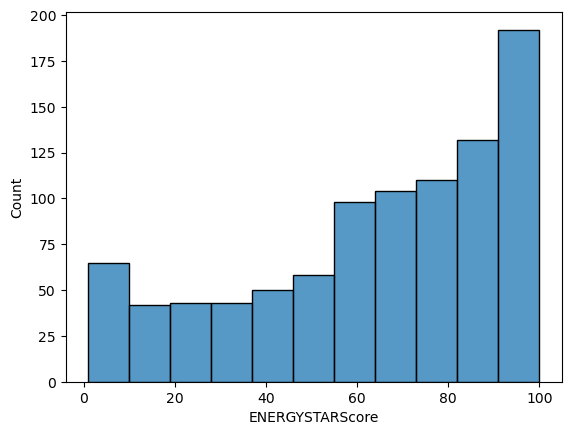

In [31]:
sns.histplot(raw['ENERGYSTARScore'])

## One hot encoder sur variables catégorielles restantes

In [32]:
raw = pd.get_dummies(raw)

In [33]:
imputer = KNNImputer(n_neighbors=2)
data = pd.DataFrame(imputer.fit_transform(raw),columns=raw.columns)


<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='Count'>

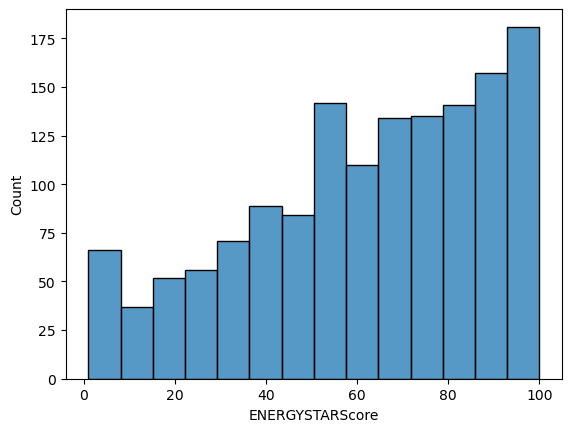

In [34]:
sns.histplot(data['ENERGYSTARScore'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Columns: 252 entries, BuildingAge to ThirdLargestPropertyUseType_Worship Facility
dtypes: float64(252)
memory usage: 2.8 MB


import scipy.stats as st
import numpy as np

UseTypes = df.iloc[:,1:].columns

df_cor = pd.DataFrame()
row = 0

for col in UseTypes :  
    row=row+1
    df_cor.loc[row,'Type']=col
    df_cor.loc[row,'corr_conso']=abs(st.pearsonr(data[col],data['SourceEUIWN(kBtu/sf)'])[0])
    df_cor.loc[row,'corr_emission']=abs(st.pearsonr(data[col],data['GHGEmissionsIntensity'])[0])

NotImportantUsesConso = df_cor.loc[((df_cor['corr_conso']<0.05) | (df_cor['corr_conso'].isna() == True)),'Type'].values
NotImportantUsesEmission = df_cor.loc[((df_cor['corr_emission']<0.05) | (df_cor['corr_emission'].isna() == True)),'Type'].values

<AxesSubplot:>

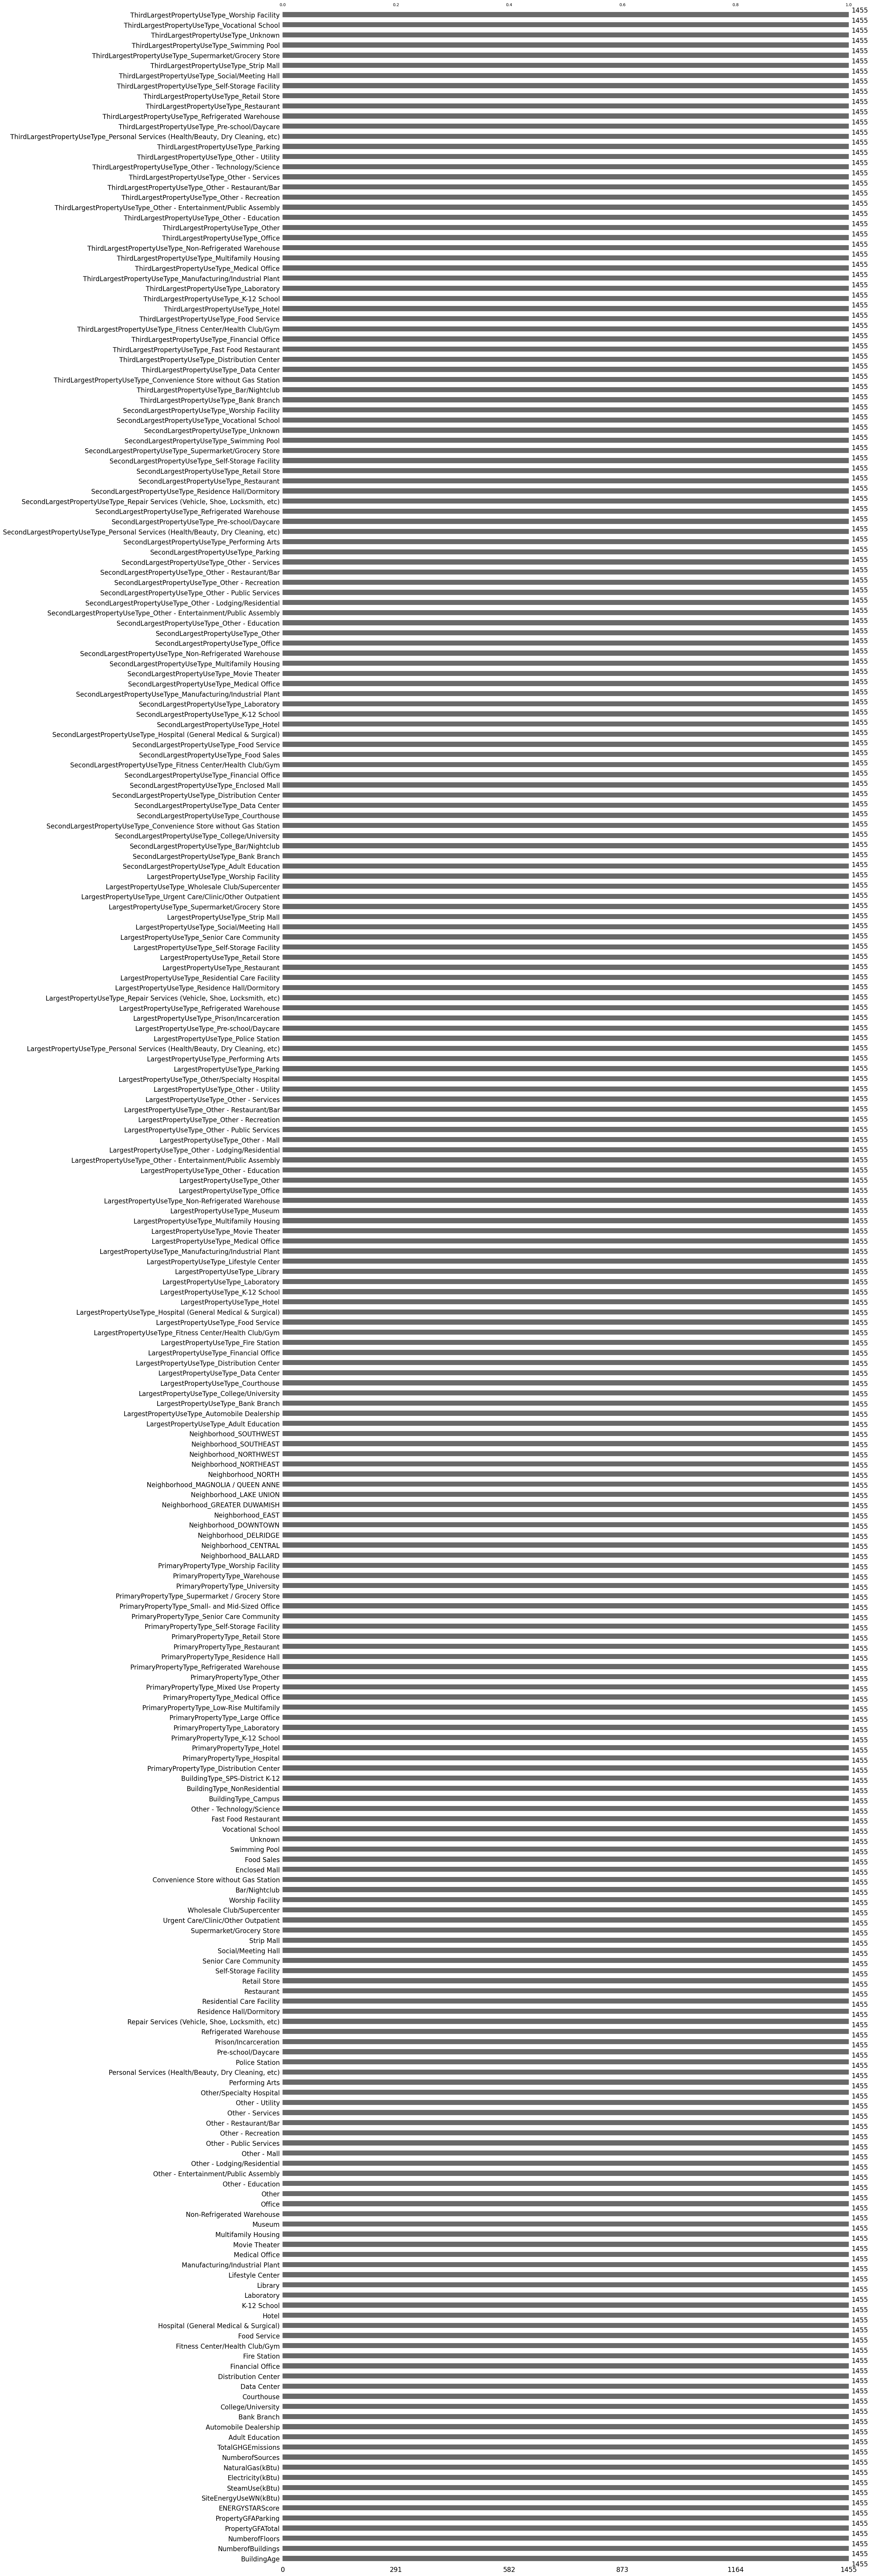

In [36]:
msno.bar(data)

In [37]:
data.to_csv('data.csv',index=False)

In [38]:
data

BuildingAge  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0            89.0                1.0            12.0           88434.0   
1            20.0                1.0            11.0          103566.0   
2            47.0                1.0            41.0          956110.0   
3            90.0                1.0            10.0           61320.0   
4            36.0                1.0            18.0          175580.0   
...           ...                ...             ...               ...   
1450         34.0                1.0             1.0           18261.0   
1451         12.0                1.0             1.0           16000.0   
1452         42.0                1.0             1.0           13157.0   
1453         27.0                1.0             1.0           14101.0   
1454         78.0                1.0             1.0           18258.0   

      PropertyGFAParking  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
0                    0.0             60.0           7.456910e+06   
1                15064.0             61.0           8.664479e+06   
2               196718.0             43.0           7.393711e+07   
3                    0.0             56.0           6.946800e+06   
4                62000.0             75.0           1.465650e+07   
...                  ...              ...                    ...   
1450                 0.0             83.0           1.025432e+06   
1451                 0.0             84.5           1.053706e+06   
1452                 0.0             40.0           6.053764e+06   
1453                 0.0             42.5           7.828413e+05   
1454                 0.0             56.0           1.293722e+06   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  ...  \
0                1.0                1.0               1.0  ...   
1                0.0                1.0               1.0  ...   
2                1.0                1.0               1.0  ...   
3                1.0                1.0               1.0  ...   
4                0.0                1.0               1.0  ...   
...              ...                ...               ...  ...   
1450             0.0                1.0               1.0  ...   
1451             0.0                1.0               1.0  ...   
1452             0.0                1.0               1.0  ...   
1453             0.0                1.0               1.0  ...   
1454             0.0                1.0               1.0  ...   

      ThirdLargestPropertyUseType_Restaurant  \
0                                        0.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
1450                                     0.0   
1451                                     0.0   
1452                                     0.0   
1453                                     0.0   
1454                                     0.0   

      ThirdLargestPropertyUseType_Retail Store  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
1450                                       0.0   
1451                                       0.0   
1452                                       0.0   
1453                                       0.0   
1454                                       0.0   

      ThirdLargestPropertyUseType_Self-Storage Facility  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                 